Лабораторная работа №1

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/nastya1204/MachineLearning/master/winequalityN.csv"
data_raw = pd.read_csv(url)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует определенному виду вина) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data_raw.shape

(6497, 13)

Отображаем первые строки таблицы (по умолчанию 5):

In [4]:
data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Отображаем последние строки таблицы (по умолчанию 5):

In [5]:
data_raw.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Мы видим, что столбцы (признаки) имеют имена:

1)type - тип вина, либо белое, либо красное.

2)fixed acidity - фиксированная кислотность вина.
Естественное свойство винограда, благодаря которому красное вино возбуждает аппетит, а белое освежает. Повышенная кислотность придает вину резкий вкус, тогда как ее недостаток делает вино слабым и вялым. Измеряется в граммах на литр.

3)volatile acidity - летучая кислотность вина.
Ароматы уксусной кислоты или этилацетата. В небольших концентрациях могут улучшать характеристики вина. При пре вышении концентрации вино приобретает запах уксуса или жидкости для снятия лака с ногтей.

4)citric acid - лимонная кислота, гр/л.

5)residual sugar - остаточный сахар.
Количество сахара, которое в процессе ферментации не переработалось в спирт и осталось в вине.

6)chlorides - хлориды.

7)free sulfur dioxide - свободный диоксид серы.

8)total sulfur dioxide - общий диоксид серы.

9)density - плотность.

10)pH - кислотность.

11)sulphates - сульфаты.

12)alcohol - крепость вина,%.

13)quality - качество вина, от 0 до 10.

Имена столбцов (признаков) можно получить таким образом:

In [6]:
data_raw.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Диапазоны индексов:

In [7]:
data_raw.index

RangeIndex(start=0, stop=6497, step=1)

Доступ к отдельным элементам и выделение подтаблиц (slice):

In [8]:
data_raw.at[3, 'volatile acidity']

0.23

In [9]:
data_raw.loc[3, 'volatile acidity']

0.23

In [10]:
data_raw.iat[3, 2]

0.23

In [11]:
data_raw.iloc[3, 2]

0.23

Подтаблицы

In [12]:
data_raw.loc[[13,551,1050,2467,4679], ['fixed acidity', 'volatile acidity', 'citric acid','quality']]

,fixed acidity,volatile acidity,citric acid,quality
13,6.6,0.160,0.40,7
551,9.2,0.250,0.34,7
1050,7.3,0.240,0.34,5
2467,7.0,0.280,0.32,6
4679,4.7,0.335,0.14,5


In [13]:
data_raw.iloc[[13,551,1050,2467,4679], [1,2,3,12]]

,fixed acidity,volatile acidity,citric acid,quality
13,6.6,0.160,0.40,7
551,9.2,0.250,0.34,7
1050,7.3,0.240,0.34,5
2467,7.0,0.280,0.32,6
4679,4.7,0.335,0.14,5


In [14]:
data_raw.loc[[13,551,1050,2467,4679], ['fixed acidity', 'volatile acidity', 'citric acid','quality']].loc[1050, 'fixed acidity']

7.3

In [15]:
data_raw.iloc[[13,551,1050,2467,4679], [1,2,3,12]].iloc[2, 0]

7.3

Целые строки или столбцы:

In [16]:
data_raw.loc[:, ['fixed acidity', 'volatile acidity']]

,fixed acidity,volatile acidity
0,7.0,0.270
1,6.3,0.300
2,8.1,0.280
3,7.2,0.230
4,7.2,0.230
...,...,...
6492,6.2,0.600
6493,5.9,0.550
6494,6.3,0.510
6495,5.9,0.645


In [17]:
data_raw.loc[[4, 6446], :]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6446,red,11.2,0.40,0.50,2.0,0.099,19.0,50.0,0.99783,3.10,0.58,10.4,5


In [18]:
data_raw['quality']

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [19]:
data_raw.quality

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [20]:
data_raw[['fixed acidity', 'volatile acidity']]

,fixed acidity,volatile acidity
0,7.0,0.270
1,6.3,0.300
2,8.1,0.280
3,7.2,0.230
4,7.2,0.230
...,...,...
6492,6.2,0.600
6493,5.9,0.550
6494,6.3,0.510
6495,5.9,0.645


Доступ по булевой маске

In [21]:
df = data_raw.iloc[4895:4902, :4]
df

,type,fixed acidity,volatile acidity,citric acid
4895,white,6.5,NaN,0.19
4896,white,5.5,0.29,0.30
4897,white,6.0,0.21,0.38
4898,red,7.4,0.70,0.00
4899,red,7.8,0.88,0.00
4900,red,7.8,0.76,0.04
4901,red,11.2,0.28,0.56


In [22]:
df.loc[[False, True, False, True, False, True, False], [False, True, True, False]] # или iloc

,fixed acidity,volatile acidity
4896,5.5,0.29
4898,7.4,0.70
4900,7.8,0.76


In [23]:
df.loc[[False, True, True, True, True, False, False]] # или iloc

,type,fixed acidity,volatile acidity,citric acid
4896,white,5.5,0.29,0.30
4897,white,6.0,0.21,0.38
4898,red,7.4,0.70,0.00
4899,red,7.8,0.88,0.00


In [24]:
df[[False, True, True, True, True, False, False]]

,type,fixed acidity,volatile acidity,citric acid
4896,white,5.5,0.29,0.30
4897,white,6.0,0.21,0.38
4898,red,7.4,0.70,0.00
4899,red,7.8,0.88,0.00


In [25]:
df.loc[df.type == 'white', ]

,type,fixed acidity,volatile acidity,citric acid
4895,white,6.5,NaN,0.19
4896,white,5.5,0.29,0.30
4897,white,6.0,0.21,0.38


Визуализация и описательная статистика

Сводную информацию о признаках можем получить, вызвав метод describe:

In [26]:
data_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

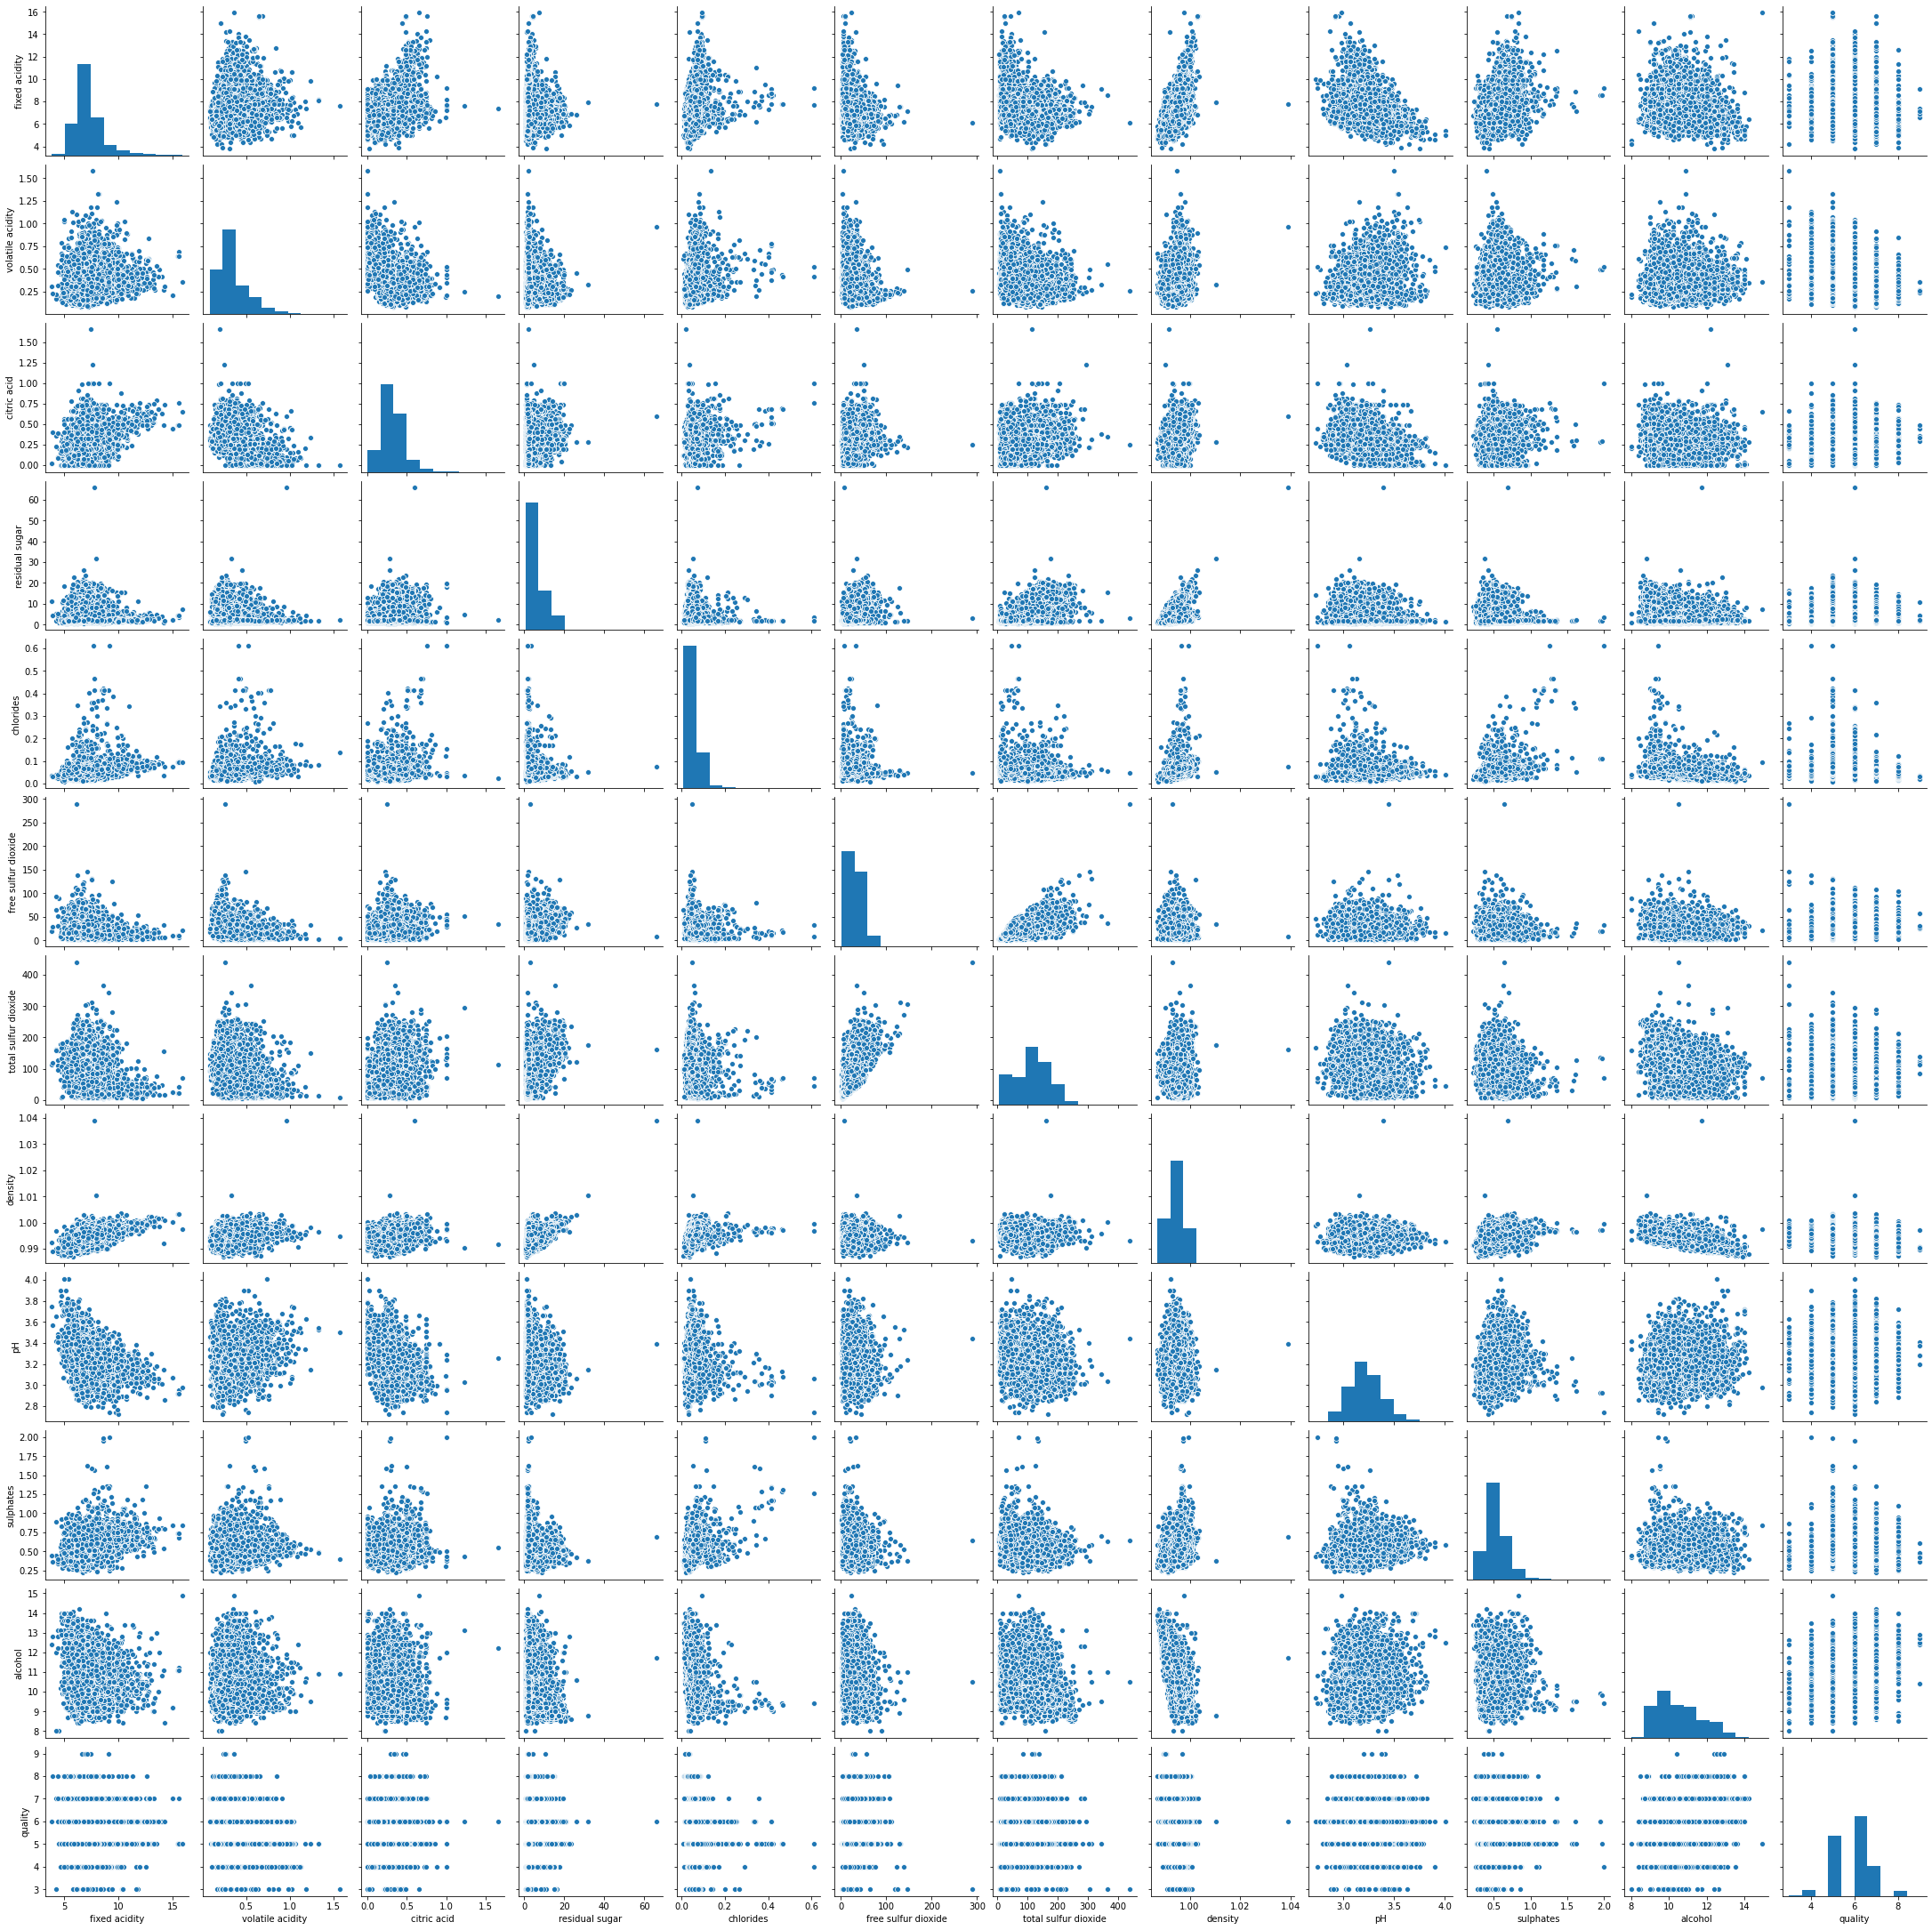

In [27]:
sns.pairplot(data_raw, diag_kind='hist')
pass

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.
Построить гистограмму можно с помощью функции plt.hist, но мы воспользуемся distplot из библиотеки seaborn.

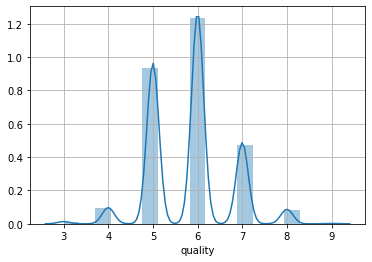

In [28]:
sns.distplot(data_raw['quality'], bins=17)
plt.grid()
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [29]:
corr_mat = data_raw.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

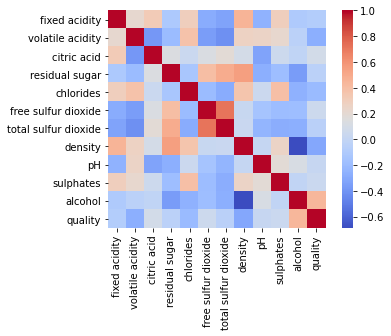

In [30]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Разобьем признаки на количественные и номинальные:

In [31]:
categorical_signs = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_signs   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_signs)
print(numerical_signs)

['type']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


Значения, которые принимает признак "type", можно получить следующим образом:

In [32]:
for c in categorical_signs:
    print(c, ": ", data_raw[c].unique())

type :  ['white' 'red']


In [33]:
for c in categorical_signs:
    print(c, ": ", data_raw[c].value_counts())

type :  white    4898
red      1599
Name: type, dtype: int64


Заполнение пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце таблицы:

In [34]:
data_raw.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Так как данных достаточно много, а количество пропусков мало, то мы можем смело удалить строки с пропущенными значениями. 

In [35]:
data_raw = data_raw.dropna(axis = 0)

Проверка, что пропусков больше нет:

In [36]:
data_raw.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

4. Бинаризация номинальных признаков

In [37]:
data_raw['type'].unique()

array(['white', 'red'], dtype=object)

Бинарный признак "Type" заменим на числовой. "red" = 1, "white" = 0

In [38]:
data_raw['type'] = pd.factorize(data_raw['type'])[0]
data_raw['type'].describe()

count    6463.000000
mean        0.246480
std         0.430995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: type, dtype: float64

In [39]:
data_raw['type'].unique()

array([0, 1])

Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др. Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [40]:
data_stand = data_raw[numerical_signs]
data_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Нормализация (из значения вычитаем среднее по столбцу и делим полученное на стандартное отклонение)

In [41]:
data_stand = (data_stand - data_stand.mean(axis = 0))/data_stand.std(axis = 0)
data_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03
mean,1.033581e-14,-3.842702e-15,3.475560e-14,-5.084591e-15,-7.830328e-15,2.769975e-16,1.680434e-15,1.642403e-12,1.963691e-14,-1.005199e-14,-4.359882e-14,2.168839e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.633270e+00,-1.576715e+00,-2.194510e+00,-1.018312e+00,-1.341551e+00,-1.662097e+00,-1.940577e+00,-2.528009e+00,-3.101975e+00,-2.089467e+00,-2.089319e+00,-3.227471e+00
25%,-6.300537e-01,-6.656323e-01,-4.733664e-01,-7.660440e-01,-5.147708e-01,-7.611355e-01,-6.845343e-01,-7.888463e-01,-6.743362e-01,-6.792513e-01,-8.321195e-01,-9.372705e-01
50%,-1.677731e-01,-3.011992e-01,-6.029195e-02,-5.137764e-01,-2.581838e-01,-8.541478e-02,4.078616e-02,6.407665e-02,-5.186461e-02,-1.420263e-01,-1.616132e-01,2.078295e-01
75%,3.715542e-01,3.669283e-01,4.904739e-01,5.583613e-01,2.549901e-01,5.903060e-01,7.130344e-01,7.670717e-01,6.328541e-01,4.623518e-01,6.765196e-01,2.078295e-01
max,6.689389e+00,7.534114e+00,9.233882e+00,1.268823e+01,1.582127e+01,1.455520e+01,5.737206e+00,1.475368e+01,4.927908e+00,9.863789e+00,3.693798e+00,3.643130e+00


Соединяем все в одну таблицу:

In [42]:
data_raw = pd.concat((data_stand, data_raw[categorical_signs]), axis = 1)
data_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6463.000000
mean,1.033581e-14,-3.842702e-15,3.475560e-14,-5.084591e-15,-7.830328e-15,2.769975e-16,1.680434e-15,1.642403e-12,1.963691e-14,-1.005199e-14,-4.359882e-14,2.168839e-15,0.246480
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.430995
min,-2.633270e+00,-1.576715e+00,-2.194510e+00,-1.018312e+00,-1.341551e+00,-1.662097e+00,-1.940577e+00,-2.528009e+00,-3.101975e+00,-2.089467e+00,-2.089319e+00,-3.227471e+00,0.000000
25%,-6.300537e-01,-6.656323e-01,-4.733664e-01,-7.660440e-01,-5.147708e-01,-7.611355e-01,-6.845343e-01,-7.888463e-01,-6.743362e-01,-6.792513e-01,-8.321195e-01,-9.372705e-01,0.000000
50%,-1.677731e-01,-3.011992e-01,-6.029195e-02,-5.137764e-01,-2.581838e-01,-8.541478e-02,4.078616e-02,6.407665e-02,-5.186461e-02,-1.420263e-01,-1.616132e-01,2.078295e-01,0.000000
75%,3.715542e-01,3.669283e-01,4.904739e-01,5.583613e-01,2.549901e-01,5.903060e-01,7.130344e-01,7.670717e-01,6.328541e-01,4.623518e-01,6.765196e-01,2.078295e-01,0.000000
max,6.689389e+00,7.534114e+00,9.233882e+00,1.268823e+01,1.582127e+01,1.455520e+01,5.737206e+00,1.475368e+01,4.927908e+00,9.863789e+00,3.693798e+00,3.643130e+00,1.000000


X и Y

Выбрасываем столбец "type":

In [43]:
X = data_raw.drop(('type'), axis = 1) 
Y = data_raw['type']
feature_names = X.columns
type(feature_names)

pandas.core.indexes.base.Index

Признаки без "type":

In [44]:
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [45]:
print(X.shape, "     ",Y.shape)

(6463, 12)       (6463,)


Разбиваем выборку на обучающую и тестовую в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

4847 1616


kNN

Используем k ближайших соседей с числом соседей равным 10.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

Предсказываем данные для тестовой и обучающей выборки:

In [48]:
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)

print('Test predict ' + str(Y_test_predict))
print('Train predict ' + str(Y_train_predict))

Test predict [0 0 1 ... 0 0 1]
Train predict [0 0 0 ... 1 1 0]


Считаем ошибку на тестовой и обучающей выборке:

In [49]:
err_train = np.mean(Y_train != Y_train_predict)
err_test  = np.mean(Y_test  != Y_test_predict)

print(err_train, err_test)

0.006395708685785022 0.006806930693069307


Построим confusion matrix для оценки точности:

In [50]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_test_predict))

[[1212    7]
 [   4  393]]


Из матрицы видно, что ошибок очень мало. Метод 4 раз ошибся, говоря, что вино белое, хотя оно было красным, и всего 7 раз сказал, что белое вино - красное.